In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import keras

Using TensorFlow backend.


In [2]:
# 這邊做圖片的前處理 (放大/縮小/加邊框)

directory = "E:/Top & Bottom/Bottom"
desired_size = 200

os.chdir(directory)
images = os.listdir(directory)
img_no = 0
for image in images:
    im = cv2.imread(image)

    old_size = old_height, old_width = im.shape[:2]
    ratio = float(desired_size/max(old_size))
    new_height, new_width = int(old_height*ratio), int(old_width*ratio)
    img = cv2.resize(im, (new_width, new_height))
    
    left = (desired_size-new_width)//2
    right = desired_size-(new_width+left)
    top = (desired_size-new_height)//2
    bottom = desired_size-(new_height+top)
    color = [255, 255, 255] # white R,G,B
    
    img2 = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value = color)
    
    img_no += 1
    img_name = "Bottom" + "_" + str(img_no) +".jpg" #Modify name each pic
    cv2.imwrite(img_name, img2)
    
    print(f"Created: {img_name} from {image}")

In [3]:
# 設定好圖片資料夾位置及上/下身
DIRECTORY = "E:/Top & Bottom/Test"
CATEGORIES = ["Bottom", "Top"]

In [4]:
# 這邊產生X(圖片)，利用cv2.imread將圖片存成(200, 200, 3)的array，將全部的array合併

i = 0
for image in os.listdir(DIRECTORY):
    
    i+=1
    img_array = cv2.imread(os.path.join(DIRECTORY, image))
    if i==1:
        X = img_array
    
    else:
        X = np.append(X, img_array)
    
    #方便追蹤進度
    if i%100 == 0:
        print(f"{i} images loaded")
    
X = np.array(X).reshape(i, 200, 200, 3)
print("All images loaded")

100 images loaded
200 images loaded
300 images loaded
400 images loaded
500 images loaded
600 images loaded
700 images loaded
All images loaded


In [5]:
# 這邊產生Y(上ㄅ
number_of_pics = 390

"""
"Bottom" : 0
"Top" : 1
"""

Y = []
for i in range(2):
    Y.append([i]*number_of_pics)
    
Y = np.array(Y)
Y = Y.reshape(number_of_pics*2, ) #Reshape成接下來可供訓練的格式

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 50)

In [7]:
# 原本Array裡面的元素都是0~255，訓練神經網路時裡面的元素需要是0~1，所以整個矩陣除以255
X_train = X_train/255
X_test = X_test/255

In [8]:
from keras.utils import to_categorical

In [9]:
# One-hot encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [10]:
#必要套件
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Activation, Flatten
from keras.optimizers import Adam, SGD

In [11]:
model = Sequential()

In [12]:
# 加入第一層時需要設定input形狀，這邊是(100, 100, 3)
model.add(Conv2D(8, (3, 3), padding = 'same', input_shape = (200, 200, 3), activation = 'relu'))

In [13]:
model.add(Conv2D(8, (3, 3), padding = 'same', activation = 'relu'))

In [14]:
model.add(MaxPool2D(pool_size = (2, 2)))

In [15]:
model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))

In [16]:
model.add(MaxPool2D(pool_size = (2, 2)))

In [17]:
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))

In [18]:
model.add(MaxPool2D(pool_size = (2, 2)))

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(32, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [21]:
model.compile(loss = "logcosh", optimizer=Adam(lr = 0.001), metrics = ['accuracy'])

In [22]:
# 查看模型架構
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 8)       224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 8)       584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 8)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 16)      1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 16)      2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 32)        4640      
__________

In [23]:
# 餵入 X_train, Y_train
model.fit(X_train, Y_train, batch_size = 20, epochs = 10)


Epoch 1/10
702/702 [==============================] - 16s 22ms/step - loss: 0.0971 - acc: 0.6624
Epoch 2/10
702/702 [==============================] - 5s 8ms/step - loss: 0.0494 - acc: 0.8533
Epoch 3/10
702/702 [==============================] - 5s 8ms/step - loss: 0.0297 - acc: 0.9174
Epoch 4/10
702/702 [==============================] - 5s 8ms/step - loss: 0.0179 - acc: 0.9530
Epoch 5/10
702/702 [==============================] - 5s 8ms/step - loss: 0.0122 - acc: 0.9701
Epoch 6/10
702/702 [==============================] - 6s 8ms/step - loss: 0.0111 - acc: 0.9729
Epoch 7/10
702/702 [==============================] - 6s 8ms/step - loss: 0.0093 - acc: 0.9772
Epoch 8/10
702/702 [==============================] - 6s 8ms/step - loss: 0.0056 - acc: 0.9872
Epoch 9/10
702/702 [==============================] - 6s 8ms/step - loss: 0.0062 - acc: 0.9829
Epoch 10/10
702/702 [==============================] - 5s 8ms/step - loss: 0.0049 - acc: 0.9858


In [24]:
# 使用訓練好的神經網路幫測試資料分類
Y_predict = model.predict_classes(X_test)

In [25]:
# 查看測試資料分類正確率
score = model.evaluate(X_test, Y_test)
print(f"Accuracy: {score[1]}")

78/78 [==============================] - 0s 4ms/step
Accuracy: 0.9615384615384616


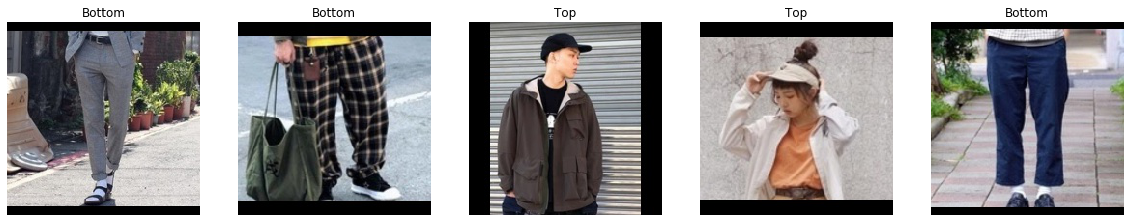

In [36]:
num = np.random.randint(1, len(Y_test), 5)
plt.figure(figsize=(20, 20))
for i in range(5):
    plt.subplot(1,5,i+1)
    X_pixels = X_test[num[i]].reshape(200, 200, 3)[:,:,::-1]
    plt.imshow(X_pixels)
    plt.title(CATEGORIES[Y_predict[num[i]]])
    plt.axis("off")